# Uso de características polinómicas


In [16]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Vamos a crear un dataset sencillo compuesto por muestras numéricas y una sola característica. Pintamos el resultado de una predicción realizada con una regresión linea para ver que obtenemos una recta que ajusta los datos, aunque el ajuste podría ser mejorable:

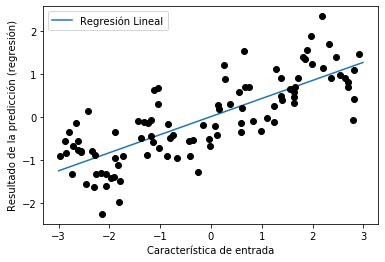

In [30]:
X, y = mglearn.datasets.make_wave(n_samples=100) #Entradas, salidas
# Creamos mil puntos en el intervalo -3 a 3 para hacer una predicción posterior
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="Regresión Lineal")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Resultado de la predicción (regresión)")
plt.xlabel("Característica de entrada")
plt.legend(loc="best")

Comprobamos que, en efecto, nuestro dataset tiene 100 muestras y una sola característica:

In [31]:
X.shape

(100, 1)

Ahora procedemos a instanciar un preprocesador de características polinómicas, donde le estamos diciendo que cree un polinomio de grado 10 y aplique la transformación, sin considerar el termino de corte (bias):

In [33]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
# Creamos un dataset ampliado con este preprocesador
X_poly = poly.transform(X)

Podemos ver, comparando las dimensiones de este nuevo dataset, que ahora tenemos 10 características en vez de 1:

In [34]:
X_poly.shape

(100, 10)

Comparemos las muestras que tenemos en X con las que hay en el nuevo dataset ampliado X_poly:

In [35]:
print("Entradas para X:\n{}".format(X[:5]))
print("Entradas para X_poly:\n{}".format(X_poly[:5]))

Entradas para X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entradas para X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


El transformador ha creado las características con nombres que indican el grado de la potencia correspondiente:

In [36]:
print("Nombres de características polinómicas:\n{}".format(poly.get_feature_names()))

Nombres de características polinómicas:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


Puede verse que la primera columna corresponde exactamente a X, mientras que el resto son las potencias de la primera. Puede verse que los valores pueden llegar a hacerse muy grandes con esta técnica: la segunda columna por ejemplo tiene entradas que son 4 órdenes de magnitud más grandes.

Ahora, con este nuevo dataset ampliado gracias a las características polinómicas, vamos a ver cómo un modelo de regresión lineal clásico opera como si fuese una regresión polinómica:

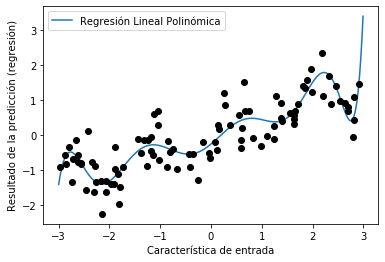

In [37]:
reg = LinearRegression().fit(X_poly, y)
# Transformamos también el dataset de test
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='Regresión Lineal Polinómica')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Resultado de la predicción (regresión)")
plt.xlabel("Característica de entrada")
plt.legend(loc="best")

Como puede verse, las características polinómicas producen un ajuste suave sobre estos datos unidimensionales. Sin embargo, estos polinomios de grado alto tienen tendencia a comportarse de manera extrema en las regiones del borde o que tienen pocos datos.

Este tipo de transformación es el que hemos aplicado en el dataset boston_housing, generando un extended_boston_housing que será más adecuado para su uso con modelos de predicción lineal.